# Global Terrorism Project - Itay Yaakov & Kobi Nisim

#### Imports

In [80]:
import json
import pandas as pd
import requests
import numpy as np #rplace to nan
import matplotlib.pyplot as plt # grahaps
import matplotlib.cm as cm
import seaborn as sns # column graph
%matplotlib inline 
#the graphs is inline
from time import sleep 
#import sklearn func for regression
from sklearn import linear_model
from sklearn import ensemble
#import visualization setup
plt.rcParams['figure.figsize'] = (10, 6)


In [13]:
from bs4 import BeautifulSoup #crawling
import time
from datetime import datetime

In [14]:
"""
DATE=list()
COUNTRY=list()
CITY=list()
PERPETRATOR_GROUP=list()
FATALITIES=list()
INJURED=list()
TARGET_TYPE=list()
YEAR=list()
MONTH=list()


for n_page in range(1,900):
    url=f'https://www.start.umd.edu/gtd/search/Results.aspx?expanded=yes&casualties_type=&casualties_max=&success=yes&ob=GTDID&od=desc&page={n_page}&count=100'
    html=requests.get(url)
    
    if html.status_code != 200:
        print("the requst not succes ")  
    soup=BeautifulSoup(html.content,"html.parser")
    tbl = soup("table",attrs={"class":"results"})[0]
    Elements=tbl.find("tbody")
    for element in Elements.find_all("tr"):
            Line=element.find_all("td")
            date=(Line[1].string)   #strint to time
            my_time = time.strptime(date, '%Y-%m-%d')
            timestamp = time.mktime(my_time)
            my_datetime = datetime.fromtimestamp(timestamp)
            DATE.append(my_datetime) 
            YEAR.append(my_datetime.year)
            COUNTRY.append(Line[2].string)
            CITY.append(Line[3].string)
            PERPETRATOR_GROUP.append(Line[4].string)
            FATALITIES.append(Line[5].string)
            INJURED.append(Line[6].string)
            TARGET_TYPE.append(Line[7].string)
    sleep(1)          
        


df=pd.DataFrame.from_dict({"DATE": DATE, "COUNTRY": COUNTRY,"CITY":CITY, "PERPETRATOR_GROUP":PERPETRATOR_GROUP, "FATALITIES":FATALITIES, "INJURED":INJURED, "TARGET_TYPE":TARGET_TYPE,"YEAR":YEAR}) 
df.to_csv("new.csv")

count_duplicatives(df)
df.duplicated().sum()
df=Unknown_To_NaN(df)
df=Removing_NaN(df)
df=str_TO_int(df)
Top_Countries=TopCountries(df)
"""

'\nDATE=list()\nCOUNTRY=list()\nCITY=list()\nPERPETRATOR_GROUP=list()\nFATALITIES=list()\nINJURED=list()\nTARGET_TYPE=list()\nYEAR=list()\nMONTH=list()\n\n\nfor n_page in range(1,900):\n    url=f\'https://www.start.umd.edu/gtd/search/Results.aspx?expanded=yes&casualties_type=&casualties_max=&success=yes&ob=GTDID&od=desc&page={n_page}&count=100\'\n    html=requests.get(url)\n    \n    if html.status_code != 200:\n        print("the requst not succes ")  \n    soup=BeautifulSoup(html.content,"html.parser")\n    tbl = soup("table",attrs={"class":"results"})[0]\n    Elements=tbl.find("tbody")\n    for element in Elements.find_all("tr"):\n            Line=element.find_all("td")\n            date=(Line[1].string)   #strint to time\n            my_time = time.strptime(date, \'%Y-%m-%d\')\n            timestamp = time.mktime(my_time)\n            my_datetime = datetime.fromtimestamp(timestamp)\n            DATE.append(my_datetime) \n            YEAR.append(my_datetime.year)\n            COUNTR

## Clean up the data ! 

##### convert string To int (INJURED,FATALITIES)

In [15]:

def str_TO_int(df):
    df["INJURED"]=df["INJURED"].astype(int)
    df["FATALITIES"]=df["FATALITIES"].astype(int)
    
    return df

###### chek if there is duplicate and remove them

In [16]:
def count_duplicatives(df):
    if(df.duplicated().sum() != 0):
        return remove_duplicatives(df)
        

In [17]:
def remove_duplicatives(df):
    return df.drop_duplicates(keep=False,inplace=True)

###### replace str 'UNKNOWN' to NAN

In [18]:
def Unknown_To_NaN(df):
    return df.replace('Unknown',np.nan)

###### removing NAN

In [19]:
def Removing_NaN(df):
    return df.dropna()

In [20]:
def TopCountries(df):
    TOP=df['COUNTRY'].value_counts()[0:3]
    TOP=TOP.index.tolist()
    return TOP

In [21]:
def Top_PERPETRATOR_GROUP(df):
    TOP_p=df['PERPETRATOR_GROUP'].value_counts()[0:3]
    TOP_p=TOP_p.index.tolist()
    return TOP_p

## READ FROM CSV

In [22]:
all_data = pd.read_csv(r'C:\Users\itayy\Desktop\computerScince\Terrorism.project\aaa.csv',skipinitialspace = True)
all_data.head()#check


,Unnamed: 0,DATE,COUNTRY,CITY,PERPETRATOR_GROUP,FATALITIES,INJURED,TARGET_TYPE,YEAR
0,5,2019-12-30,Iraq,Nada,Islamic State of Iraq and the Levant (ISIL),1,0,Military,2019
1,6,2019-12-31,Cameroon,Njap,Separatists,1,0,Private Citizens & Property,2019
2,9,2019-12-31,Russia,Magas,Caucasus Province of the Islamic State,2,4,Police,2019
3,10,2019-12-31,Philippines,Kinamaybay,New People's Army (NPA),1,0,Private Citizens & Property,2019
4,12,2019-12-31,Syria,Tabqah,Islamic State of Iraq and the Levant (ISIL),3,0,Private Citizens & Property,2019


In [23]:
type(all_data)

pandas.core.frame.DataFrame

In [24]:
all_data['MONTH']=[datetime.fromtimestamp(time.mktime(time.strptime(date, '%Y-%m-%d'))).month for date in all_data['DATE']] #add month to the colums due to the liniare reggration
all_data.head() #check

,Unnamed: 0,DATE,COUNTRY,CITY,PERPETRATOR_GROUP,FATALITIES,INJURED,TARGET_TYPE,YEAR,MONTH
0,5,2019-12-30,Iraq,Nada,Islamic State of Iraq and the Levant (ISIL),1,0,Military,2019,12
1,6,2019-12-31,Cameroon,Njap,Separatists,1,0,Private Citizens & Property,2019,12
2,9,2019-12-31,Russia,Magas,Caucasus Province of the Islamic State,2,4,Police,2019,12
3,10,2019-12-31,Philippines,Kinamaybay,New People's Army (NPA),1,0,Private Citizens & Property,2019,12
4,12,2019-12-31,Syria,Tabqah,Islamic State of Iraq and the Levant (ISIL),3,0,Private Citizens & Property,2019,12


In [25]:
all_data.info() #check the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34507 entries, 0 to 34506
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         34507 non-null  int64 
 1   DATE               34507 non-null  object
 2   COUNTRY            34507 non-null  object
 3   CITY               34507 non-null  object
 4   PERPETRATOR_GROUP  34507 non-null  object
 5   FATALITIES         34507 non-null  int64 
 6   INJURED            34507 non-null  int64 
 7   TARGET_TYPE        34507 non-null  object
 8   YEAR               34507 non-null  int64 
 9   MONTH              34507 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 2.6+ MB


# Top countries with the most terror attack

C:\Users\itayy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



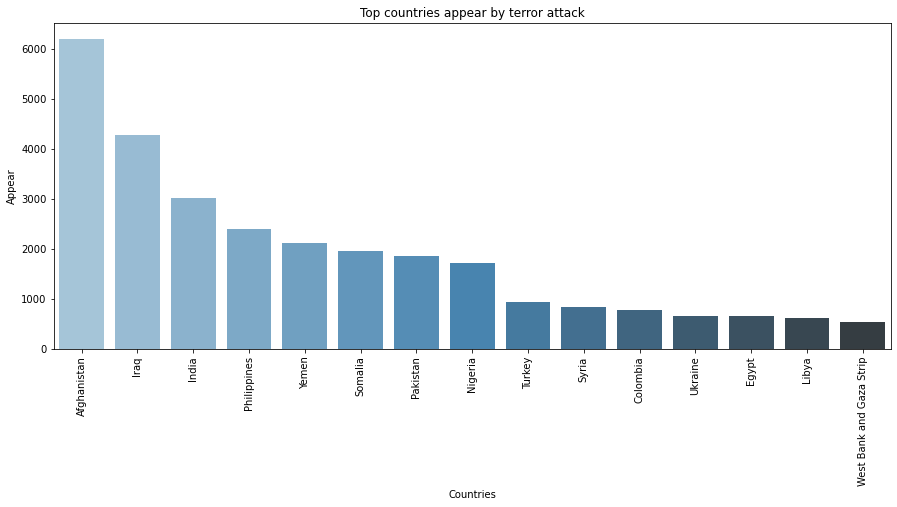

In [26]:
plt.subplots(figsize=(15,6))
sns.barplot(all_data['COUNTRY'].value_counts()[:15].index,all_data['COUNTRY'].value_counts()[:15].values,palette='Blues_d') ##
plt.title('Top countries appear by terror attack')
plt.xlabel('Countries')
plt.ylabel('Appear')
plt.xticks(rotation= 90)#rotation to countries text
plt.show()

In [81]:
top_PERPETRATOR_GROUP1=Top_PERPETRATOR_GROUP(all_data)
top_PERPETRATOR_GROUP1
new = all_data.groupby(['PERPETRATOR_GROUP']).sum()
TOP_INJURED = new.sort_values('INJURED').iloc[::-1][0:3]

TOP_FATALITIES = new.sort_values('FATALITIES').iloc[::-1][0:3]##revers
DATA = all_data.groupby(['PERPETRATOR_GROUP', 'YEAR']).sum()


####top3-TOP_INJURED
index0 =DATA.loc[TOP_INJURED.index[0]]
index1 =DATA.loc[TOP_INJURED.index[1]]
index2 =DATA.loc[TOP_INJURED.index[2]]


##top3-TOP_FATALITIES
index3 =DATA.loc[TOP_FATALITIES.index[0]]
index4 =DATA.loc[TOP_FATALITIES.index[1]]
index5 =DATA.loc[TOP_FATALITIES.index[2]]

YEAR0 = index0.index
INJURED0 = index0["INJURED"]


YEAR1 = index1.index
INJURED1 = index1["INJURED"]

YEAR2 = index2.index
INJURED2 = index2["INJURED"]

YEAR3 = index3.index
FATALITIES0 = index3["FATALITIES"]

YEAR4 = index4.index
FATALITIES1 = index4["FATALITIES"]

YEAR5 = index5.index
FATALITIES2 = index5["FATALITIES"]


                                                    Unnamed: 0  FATALITIES  \
PERPETRATOR_GROUP                                                            
313 Brigade (Syria)                                      82288           0   
A'chik Matgrik Elite Force (AMEF)                        93536           0   
A'chik Matgrik Elite Force (AMEF) (suspected),A...       52220           0   
A'chik Matgrik Elite Force (AMEF) (suspected),A...       45381           0   
A'chik Matgrik Elite Force (AMEF) (suspected),G...       55937           0   
...                                                        ...         ...   
Zero Tolerance                                          215851           0   
Zimbabwe African Nationalist Union (ZANU)                81623           0   
Zimbabwe African Nationalist Union (ZANU) (susp...      159754           1   
Zomi Revolutionary Army (ZRA)                            71648           0   
Zuwar al-Imam Rida                                       81096  

#  Questin1:Which three Terror organizations killed  most human?

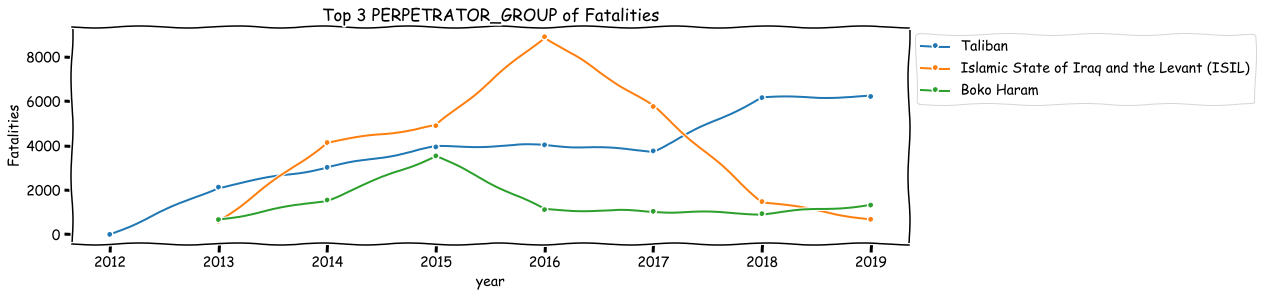

In [29]:
plt.xkcd()
plt.figure(figsize=[15,4])#size of the plt
plt.plot(YEAR3, FATALITIES0, label = TOP_FATALITIES.index[0],marker='.' )
plt.plot(YEAR4, FATALITIES1, label = TOP_FATALITIES.index[1],marker='.'  )
plt.plot(YEAR5, FATALITIES2, label = TOP_FATALITIES.index[2],marker='.' )
plt.xlabel('year')
plt.ylabel('Fatalities')
plt.title('Top 3 PERPETRATOR_GROUP of Fatalities')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.savefig('plot.png')
plt.show()


#  Questin2:Which three Terror organizations Injured  most human?

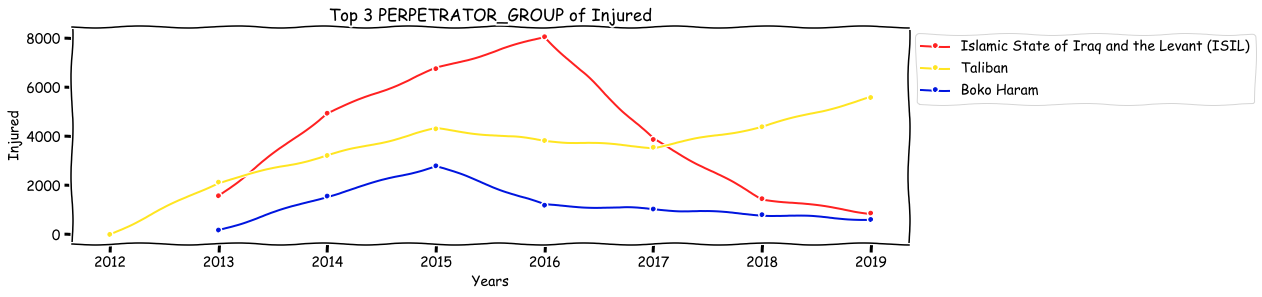

In [30]:
plt.xkcd()
plt.figure(figsize=[15,4])#size of the plt
plt.plot(YEAR0, INJURED0, color='#ff2121', label = TOP_INJURED.index[0],marker='.')
plt.plot(YEAR1, INJURED1, color='#ffe521', label = TOP_INJURED.index[1],marker='.')
plt.plot(YEAR2, INJURED2, color='#0015df', label = TOP_INJURED.index[2],marker='.')
plt.xlabel('Years')
plt.ylabel('Injured')
plt.title('Top 3 PERPETRATOR_GROUP of Injured')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.savefig('plot.png')
plt.show()


In [31]:
new=all_data.groupby(['COUNTRY']).sum()
TOP_INJURED=new.sort_values('INJURED').iloc[::-1][0:5]
TOP_FATALITIES=new.sort_values('FATALITIES').iloc[::-1][0:5]##revers
#TOP1=TOP.iloc[:,0]

DATA = all_data.groupby(['COUNTRY', 'YEAR']).sum()
print(DATA)


####top3-TOP_INJURED
index0 =DATA.loc[TOP_INJURED.index[0]]
index1 =DATA.loc[TOP_INJURED.index[1]]
index2 =DATA.loc[TOP_INJURED.index[2]]
index31 =DATA.loc[TOP_INJURED.index[3]]

##top3-TOP_FATALITIES
index3 =DATA.loc[TOP_FATALITIES.index[0]]
index4 =DATA.loc[TOP_FATALITIES.index[1]]
index5 =DATA.loc[TOP_FATALITIES.index[2]]
index6 =DATA.loc[TOP_FATALITIES.index[3]]

YEAR0 = index0.index
INJURED0 = index0["INJURED"]

YEAR1 = index1.index
INJURED1 = index1["INJURED"]

YEAR2 = index2.index
INJURED2 = index2["INJURED"]

YEAR33 = index31.index
INJURED33 = index31["INJURED"]

YEAR3 = index3.index
FATALITIES0 = index3["FATALITIES"]

YEAR4 = index4.index
FATALITIES1 = index4["FATALITIES"]

YEAR5 = index5.index
FATALITIES2 = index5["FATALITIES"]

YEAR6 = index6.index
FATALITIES3 = index6["FATALITIES"]


                  Unnamed: 0  FATALITIES  INJURED  MONTH
COUNTRY     YEAR                                        
Afghanistan 2012      175783           1        3     24
            2013    51830923        2289     2544   4228
            2014    54575018        3264     3491   5620
            2015    48387861        4392     5310   6158
            2016    31624679        4754     5008   5751
...                      ...         ...      ...    ...
Zimbabwe    2013       86475           1        0      2
            2014       73279           0        0      2
            2017       69427           0        1     21
            2018       12196           0        0      8
            2019        2860           0        0      8

[526 rows x 4 columns]


# Question3: Which four countries with most Fatalities?

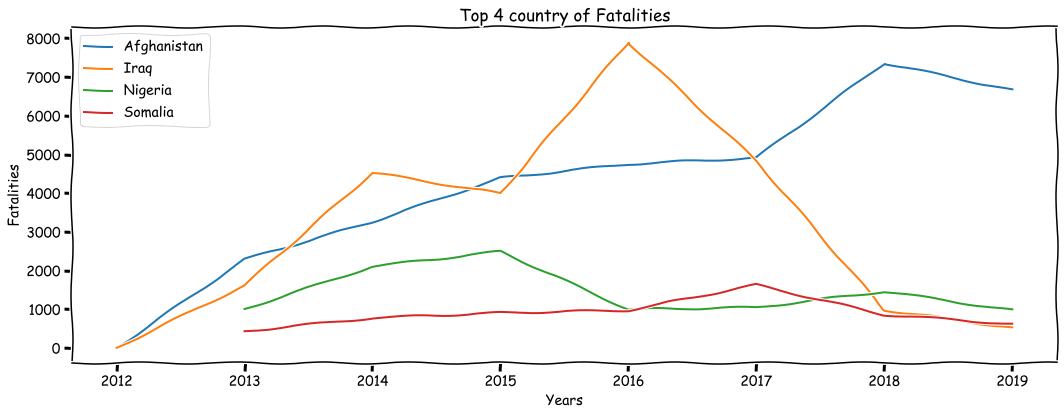

In [32]:
plt.xkcd()
plt.figure(figsize=[15,6])#size of the plt
plt.plot(YEAR3, FATALITIES0, label = TOP_FATALITIES.index[0])
plt.plot(YEAR4, FATALITIES1, label = TOP_FATALITIES.index[1])
plt.plot(YEAR5, FATALITIES2, label = TOP_FATALITIES.index[2])
plt.plot(YEAR6, FATALITIES3, label = TOP_FATALITIES.index[3])
plt.xlabel('Years')
plt.ylabel('Fatalities')
plt.title('Top 4 country of Fatalities')
plt.legend()
plt.tight_layout()
plt.savefig('plot.png')
plt.show()


# Question4: Which four countries with most Injured?

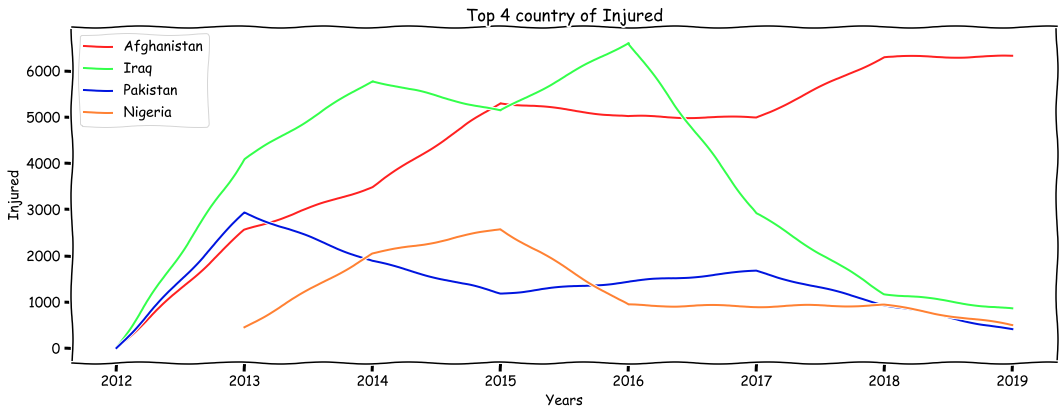

In [33]:
plt.xkcd()
plt.figure(figsize=[15,6])#size of the plt
plt.plot(YEAR0, INJURED0, color='#ff2121', label = TOP_INJURED.index[0])
plt.plot(YEAR1, INJURED1, color='#33FF4B', label = TOP_INJURED.index[1])
plt.plot(YEAR2, INJURED2, color='#0015df', label = TOP_INJURED.index[2])
plt.plot(YEAR33, INJURED33, color='#ff8133', label = TOP_INJURED.index[3])
plt.xlabel('Years')
plt.ylabel('Injured')
plt.title('Top 4 country of Injured')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('plot.png')
plt.show()


In [34]:
new=all_data.groupby(['COUNTRY']).sum()
DATA = all_data.groupby(['TARGET_TYPE']).sum()
TOP_DATA_FATALITIES=DATA.sort_values('FATALITIES').iloc[::-1][0:5]
TOP_DATA_FATALITIES

,Unnamed: 0,FATALITIES,INJURED,YEAR,MONTH
TARGET_TYPE,,,,,
Private Citizens & Property,336423824,31930,39391,18082642,58186
Military,286838698,26787,20745,14646075,46756
Police,212964139,16685,14674,10628014,33945
"Military,Private Citizens & Property",37543387,4581,6308,1828367,5862
Business,90200582,3463,6398,4285583,13252


In [35]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=all_data.FATALITIES, x=all_data.YEAR, y=all_data.COUNTRY, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top  Worst Terror Attacks in History ',
    xaxis = dict(ticks='', ),
    yaxis = dict(ticks=''))
fig = go.Figure(data=data, layout=layout)
fig.update_layout(height=1000)
py.iplot(fig, filename='heatmap',show_link=False)


0        1
1        1
2        2
3        1
4        3
        ..
34502    1
34503    1
34504    0
34505    0
34506    2
Name: FATALITIES, Length: 34507, dtype: int64

In [58]:
mini=all_data.groupby(['COUNTRY','PERPETRATOR_GROUP','YEAR']).sum()
mini

Unnamed: 0  \
COUNTRY     PERPETRATOR_GROUP                                  YEAR               
Afghanistan Haji Fateh (suspected)                             2016       30063   
            Halqa-e-Mehsud,Taliban                             2016       35201   
            Haqqani Network                                    2014       58905   
                                                               2015       94233   
                                                               2017       55986   
...                                                                         ...   
Zimbabwe    Movement for Democratic Change (MDC)               2019        2860   
            Zimbabwe African Nationalist Union (ZANU)          2017       69427   
                                                               2018       12196   
            Zimbabwe African Nationalist Union (ZANU) (susp... 2013       86475   
                                                               2014       73279   

                                                                     FATALITIES  \
COUNTRY     PERPETRATOR_GROUP                                  YEAR               
Afghanistan Haji Fateh (suspected)                             2016           0   
            Halqa-e-Mehsud,Taliban                             2016           0   
            Haqqani Network                                    2014           1   
                                                               2015           2   
                                                               2017           5   
...                                                                         ...   
Zimbabwe    Movement for Democratic Change (MDC)               2019           0   
            Zimbabwe African Nationalist Union (ZANU)          2017           0   
                                                               2018           0   
            Zimbabwe African Nationalist Union (ZANU) (susp... 2013           1   
                                                               2014           0   

                                                                     INJURED  \
COUNTRY     PERPETRATOR_GROUP                                  YEAR            
Afghanistan Haji Fateh (suspected)                             2016        0   
            Halqa-e-Mehsud,Taliban                             2016        0   
            Haqqani Network                                    2014        0   
                                                               2015        0   
                                                               2017        2   
...                                                                      ...   
Zimbabwe    Movement for Democratic Change (MDC)               2019        0   
            Zimbabwe African Nationalist Union (ZANU)          2017        1   
                                                               2018        0   
            Zimbabwe African Nationalist Union (ZANU) (susp... 2013        0   
                                                               2014        0   

                                                                     MONTH  
COUNTRY     PERPETRATOR_GROUP                                  YEAR         
Afghanistan Haji Fateh (suspected)                             2016     12  
            Halqa-e-Mehsud,Taliban                             2016      8  
            Haqqani Network                                    2014     12  
                                                               2015     20  
                                                               2017      5  
...                                                                    ...  
Zimbabwe    Movement for Democratic Change (MDC)               2019      8  
            Zimbabwe African Nationalist Union (ZANU)          2017     21  
                                                               2018      8  
            Zimbabwe 

In [84]:
all_data.head()#test

,Unnamed: 0,DATE,COUNTRY,CITY,PERPETRATOR_GROUP,FATALITIES,INJURED,TARGET_TYPE,YEAR,MONTH
0,5,2019-12-30,Iraq,Nada,Islamic State of Iraq and the Levant (ISIL),1,0,Military,2019,12
1,6,2019-12-31,Cameroon,Njap,Separatists,1,0,Private Citizens & Property,2019,12
2,9,2019-12-31,Russia,Magas,Caucasus Province of the Islamic State,2,4,Police,2019,12
3,10,2019-12-31,Philippines,Kinamaybay,New People's Army (NPA),1,0,Private Citizens & Property,2019,12
4,12,2019-12-31,Syria,Tabqah,Islamic State of Iraq and the Levant (ISIL),3,0,Private Citizens & Property,2019,12


In [85]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34507 entries, 0 to 34506
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         34507 non-null  int64 
 1   DATE               34507 non-null  object
 2   COUNTRY            34507 non-null  object
 3   CITY               34507 non-null  object
 4   PERPETRATOR_GROUP  34507 non-null  object
 5   FATALITIES         34507 non-null  int64 
 6   INJURED            34507 non-null  int64 
 7   TARGET_TYPE        34507 non-null  object
 8   YEAR               34507 non-null  int64 
 9   MONTH              34507 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 2.6+ MB


In [40]:
all_data.describe()

,Unnamed: 0,FATALITIES,INJURED,YEAR,MONTH
count,34507.000000,34507.000000,34507.000000,34507.000000,34507.000000
mean,39479.453473,3.462573,4.054192,2015.994784,6.422378
std,24564.900308,10.960040,16.376308,1.851740,3.376717
min,5.000000,0.000000,0.000000,2012.000000,1.000000
25%,18162.500000,0.000000,0.000000,2014.000000,4.000000
50%,38070.000000,1.000000,0.000000,2016.000000,6.000000
75%,59220.500000,3.000000,3.000000,2018.000000,9.000000
max,87899.000000,670.000000,1500.000000,2019.000000,12.000000


In [86]:
By_Country_Year=all_data.groupby(['COUNTRY','YEAR']).sum()


In [87]:
By_Country_Year.reset_index()
By_Country_Year=By_Country_Year.groupby(['COUNTRY'])


# First model Fatalities by Year

In [88]:
# build our first linear regression model
dictreg={}
for c in By_Country_Year.groups:
    tr=By_Country_Year.get_group(c) 
    tr=tr.reset_index().drop(columns=['COUNTRY'])
    a=tr['YEAR'].values.reshape(-1,1)
    v=tr['FATALITIES'].values.reshape(-1,1)
    m=linear_model.LinearRegression().fit(a,v)
    dictreg[c]=m    

In [44]:
print(dictreg['Afghanistan'].predict([[2017]]))#test
By_Country_Year.get_group('Afghanistan')#check

[[5586.5]]


Unnamed: 0  FATALITIES  INJURED  MONTH
COUNTRY     YEAR                                        
Afghanistan 2012      175783           1        3     24
            2013    51830923        2289     2544   4228
            2014    54575018        3264     3491   5620
            2015    48387861        4392     5310   6158
            2016    31624679        4754     5008   5751
            2017    18848969        4916     4982   5160
            2018    12849572        7363     6297   7099
            2019     4479188        6665     6306   7565

### please insert country and year to predict how many fatalities in a particular year

In [89]:
NameOfCountry = input("Please enter the country:")
Year = input("Please enter the Year:")
reg=dictreg[NameOfCountry].predict([[Year]])
print('By the regration:', reg ,'fatalities in', NameOfCountry ,'at' ,Year)

Please enter the country:Afghanistan
Please enter the Year:2030
By the regration: [[17555.16666667]] fatalities in Afghanistan at 2030


C:\Users\itayy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.

